# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
both = pd.merge(study_results, mouse_metadata, how='inner', on='Mouse ID')

#Reset Index
both = both.sort_values(['Timepoint','Metastatic Sites'], ascending = [True, False]).reset_index(drop = True)


# Display the data table for preview
both.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
both['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#Create a dataframe only with duplicated IDs
ID = both[both.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]

#Find what value(s) are in the dataframe
duplicate_ids = ID['Mouse ID'].unique()
duplicate_ids[0]

'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
both.loc[both['Mouse ID'] == duplicate_ids[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
108,g989,0,45.000000,0,Propriva,Female,21,26
389,g989,5,48.786801,0,Propriva,Female,21,26
390,g989,5,47.570392,0,Propriva,Female,21,26
646,g989,10,51.745156,0,Propriva,Female,21,26
647,g989,10,49.880528,0,Propriva,Female,21,26
782,g989,15,51.325852,1,Propriva,Female,21,26
872,g989,15,53.442020,0,Propriva,Female,21,26
1002,g989,20,55.326122,1,Propriva,Female,21,26
1003,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Create a new dataframe only locating the value not equal to the duplicated value
both_cleaned = both.loc[both['Mouse ID'] != duplicate_ids[0]]
both_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
both_cleaned['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#TV = Tumor Volume
Mean_TV = pd.DataFrame(both_cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()).rename(columns={'Tumor Volume (mm3)':'Mean'})

Median_TV= pd.DataFrame(both_cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()).rename(columns={'Tumor Volume (mm3)':'Median'})

Variance_TV = pd.DataFrame(both_cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()).rename(columns={'Tumor Volume (mm3)':'Variance'})

STD_TV = pd.DataFrame(both_cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()).rename(columns={'Tumor Volume (mm3)':'Std. Dev'})

STE_TV = pd.DataFrame(both_cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()).rename(columns={'Tumor Volume (mm3)':'Std. Error'})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.merge(Mean_TV, Median_TV, how="inner", on=['Drug Regimen'])
summary_stats = pd.merge(summary_stats, Variance_TV, how="inner", on=['Drug Regimen'])
summary_stats = pd.merge(summary_stats, STD_TV, how="inner", on=['Drug Regimen'])
summary_stats = pd.merge(summary_stats, STE_TV, how="inner", on=['Drug Regimen'])

summary_stats

,Mean,Median,Variance,Std. Dev,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_stats = both_cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg(['mean','median','var', 'std', 'sem'])
aggregated_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

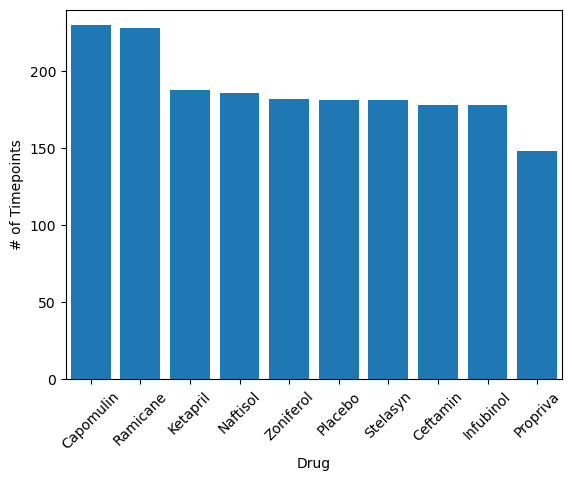

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse = both_cleaned.groupby(['Drug Regimen'])['Mouse ID'].count().sort_values(ascending=False)

#Create variables to store values
drug = list(mouse.index.values)
timepoints = list(mouse)

# Set up the plot
plt.bar(drug, timepoints)
plt.xlabel("Drug")
plt.ylabel("# of Timepoints")
plt.xticks(rotation=45)
plt.xlim(-0.5, len(drug) - 0.5)
plt.ylim(0, max(timepoints) + 10)

# Show plot
plt.show()


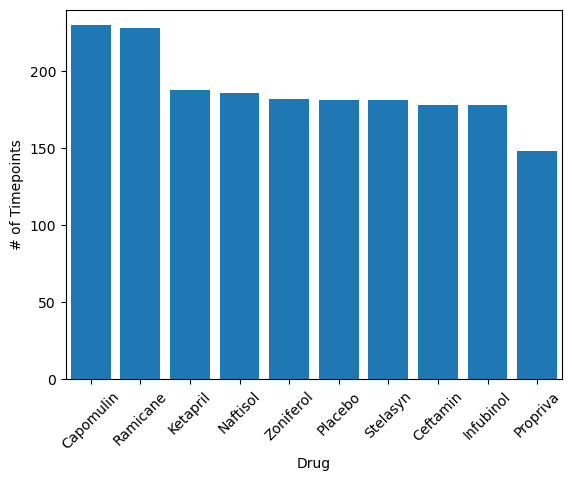

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse = both_cleaned.groupby(['Drug Regimen'])['Mouse ID'].count().sort_values(ascending=False)

#Create variables to store values
drug = list(mouse.index.values)
timepoints = list(mouse)

# Set up the plot
plt.bar(drug, timepoints)
plt.xlabel("Drug")
plt.ylabel("# of Timepoints")
plt.xticks(rotation=45)
plt.xlim(-0.5, len(drug) - 0.5)
plt.ylim(0, max(timepoints) + 10)

# Show plot
plt.show()

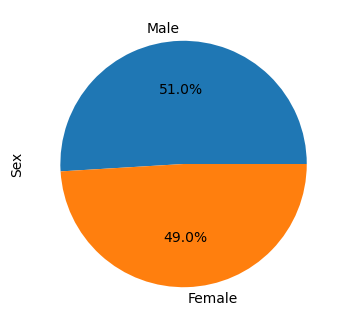

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = pd.DataFrame(both_cleaned['Sex'].value_counts())
male_v_female = male_v_female.plot.pie(y='Sex', figsize=(4, 4), autopct='%1.1f%%', legend=False)

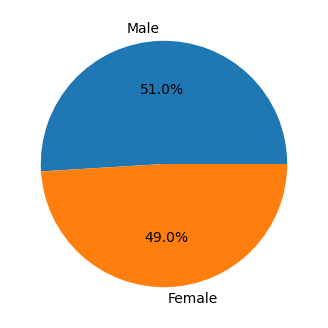

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = both_cleaned['Sex'].value_counts()


plt.figure(figsize=(4, 4))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Capomulin = both_cleaned.loc[both_cleaned['Drug Regimen'] == "Capomulin"].nlargest(1,['Timepoint'])['Tumor Volume (mm3)']
Ramicane = both_cleaned.loc[both_cleaned['Drug Regimen'] == "Ramicane"].nlargest(1,['Timepoint'])['Tumor Volume (mm3)']
Infubinol = both_cleaned.loc[both_cleaned['Drug Regimen'] == "Infubinol"].nlargest(1,['Timepoint'])['Tumor Volume (mm3)']
Ceftamin = both_cleaned.loc[both_cleaned['Drug Regimen'] == "Ceftamin"].nlargest(1,['Timepoint'])['Tumor Volume (mm3)']

#Put each location of the greatest timepoint into a dataframe
Capomulin = pd.DataFrame({"Drug Regimen" : ["Capomulin"], "Final Tumor Voulume (mm3)" : Capomulin}).set_index('Drug Regimen', drop=True)
Ramicane = pd.DataFrame({"Drug Regimen" : ["Ramicane"], "Final Tumor Voulume (mm3)" : Ramicane}).set_index('Drug Regimen', drop=True)
Infubinol = pd.DataFrame({"Drug Regimen" : ["Infubinol"], "Final Tumor Voulume (mm3)" : Infubinol}).set_index('Drug Regimen', drop=True)
Ceftamin = pd.DataFrame({"Drug Regimen" : ["Ceftamin"], "Final Tumor Voulume (mm3)" : Ceftamin}).set_index('Drug Regimen', drop=True)

#Concatonate each df into one
tumors = pd.concat([Capomulin, Ramicane, Infubinol, Ceftamin])

#Merge these with the og data set
final = pd.merge(both, tumors, how="right", on=['Drug Regimen']).fillna(method='ffill')


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = final['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
regimen_vol = []

#Create empty lists for each drug in order to combine later
Capomulin_vol = []
Ramicane_vol = []
Infubinol_vol = []
Ceftamin_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = final['Tumor Volume (mm3)'].quantile(0.25)
Q3 = final['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1

IQR_final = ((final['Tumor Volume (mm3)'] >= Q1 - 1.5*IQR) & (final['Tumor Volume (mm3)'] <= Q3 + 1.5*IQR)).value_counts()

# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final.iterrows():
        if row['Drug Regimen'] == regimen[0]:
            Capomulin_vol.append(row['Tumor Volume (mm3)'])
        elif row['Drug Regimen'] == regimen[1]:
            Ramicane_vol.append(row['Tumor Volume (mm3)'])
        elif row['Drug Regimen'] == regimen[2]:
            Infubinol_vol.append(row['Tumor Volume (mm3)'])
        elif row['Drug Regimen'] == regimen[3]:
            Ceftamin_vol.append(row['Tumor Volume (mm3)'])
        else:
            print("unexpected drug regimen")     
    
    # add subset 
regimen_vol = [Capomulin_vol, Ramicane_vol, Infubinol_vol, Ceftamin_vol]

#Add each drug into a dataframe from the subset
Capomulin_df = pd.DataFrame({regimen[0] : regimen_vol[0]})
Ramicane_df = pd.DataFrame({regimen[1] : regimen_vol[1]})
Infubinol_df = pd.DataFrame({regimen[2] : regimen_vol[2]})
Ceftamin_df = pd.DataFrame({regimen[3] : regimen_vol[3]})

regimen_TV = pd.concat([Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df], axis=1)
    
# Determine outliers for Capomulin
Capomulin_Q1 = regimen_TV[regimen[0]].quantile(0.25)
Capomulin_Q3 = regimen_TV[regimen[0]].quantile(0.75)
Capomulin_IQR = Capomulin_Q3 - Capomulin_Q1

Capomulin_IQR_final = ((regimen_TV[regimen[0]] >= Capomulin_Q1 - 1.5*Capomulin_IQR) & (regimen_TV[regimen[0]] <= Capomulin_Q3 + 1.5*Capomulin_IQR)).value_counts()

# Determine outliers for Ramicane
Ramicane_Q1 = regimen_TV[regimen[1]].quantile(0.25)
Ramicane_Q3 = regimen_TV[regimen[1]].quantile(0.75)
Ramicane_IQR = Ramicane_Q3 - Ramicane_Q1

Capomulin_IQR_final = ((regimen_TV[regimen[1]] >= Ramicane_Q1 - 1.5*Ramicane_IQR) & (regimen_TV[regimen[1]] <= Ramicane_Q3 + 1.5*Ramicane_IQR)).value_counts()

# Determine outliers for Infubinol
Infubinol_Q1 = regimen_TV[regimen[2]].quantile(0.25)
Infubinol_Q3 = regimen_TV[regimen[2]].quantile(0.75)
Infubinol_IQR = Infubinol_Q3 - Infubinol_Q1

Infubinol_IQR_final = ((regimen_TV[regimen[2]] >= Infubinol_Q1 - 1.5*Infubinol_IQR) & (regimen_TV[regimen[2]] <= Infubinol_Q3 + 1.5*Infubinol_IQR)).value_counts()

# Determine outliers for Ceftamin
Ceftamin_Q1 = regimen_TV[regimen[3]].quantile(0.25)
Ceftamin_Q3 = regimen_TV[regimen[3]].quantile(0.75)
Ceftamin_IQR = Ceftamin_Q3 - Ceftamin_Q1

Ceftamin_IQR_final = ((regimen_TV[regimen[3]] >= Ceftamin_Q1 - 1.5*Ceftamin_IQR) & (regimen_TV[regimen[3]] <= Ceftamin_Q3 + 1.5*Ceftamin_IQR)).value_counts()

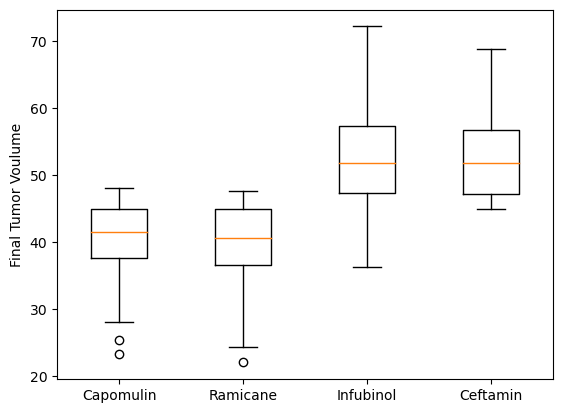

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(regimen_vol)
plt.xticks([1, 2, 3, 4], regimen)
ax1.set_ylabel("Final Tumor Voulume")
plt.show()

## Line and Scatter Plots

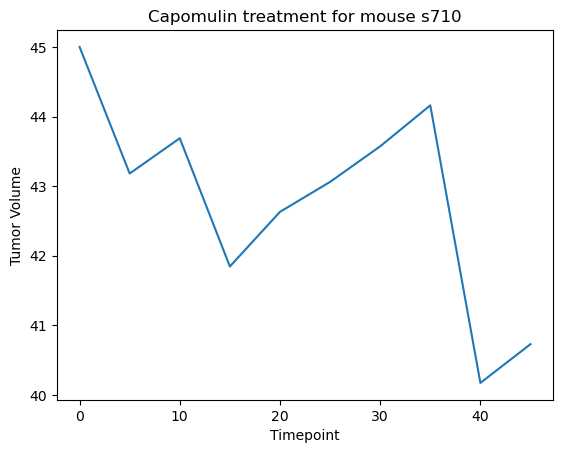

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


#This shows the mouse in index 7, with Capomulin
mouse = final[final['Drug Regimen'] == regimen[0]].iloc[7]['Mouse ID']
# Get the tumor volumes and timepoints for this mouse
tumor_vol = final[final['Mouse ID'] == mouse]['Tumor Volume (mm3)'].tolist() 
timepoints = final[final['Mouse ID'] == mouse]['Timepoint'].tolist() 

# Making the title an F string so it's changable with the mouse variable
title = (f"{regimen[0]} treatment for mouse {mouse}")

# Plot the line graph with x and y labels, and the title
plt.plot(timepoints, tumor_vol)

plt.ylabel("Tumor Volume")  
plt.xlabel("Timepoint")  
plt.title(title) 
plt.show()

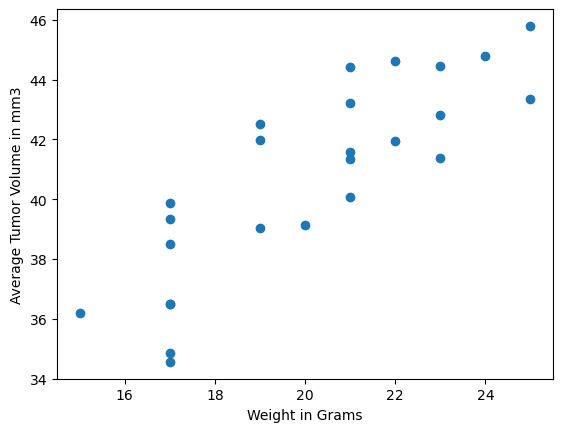

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin = final.loc[final['Drug Regimen'] == regimen[0]]

#Find averages of weight and volume
avg_weight = Capomulin.groupby("Mouse ID")["Weight (g)"].mean().tolist()
avg_tumor_vol = Capomulin.groupby("Mouse ID")['Tumor Volume (mm3)'].mean().tolist()

# Plot
plt.scatter(avg_weight, avg_tumor_vol)
plt.xlabel("Weight in Grams") 
plt.ylabel("Average Tumor Volume in mm3")
plt.show()

## Correlation and Regression

Correlation Coefficient:0.84


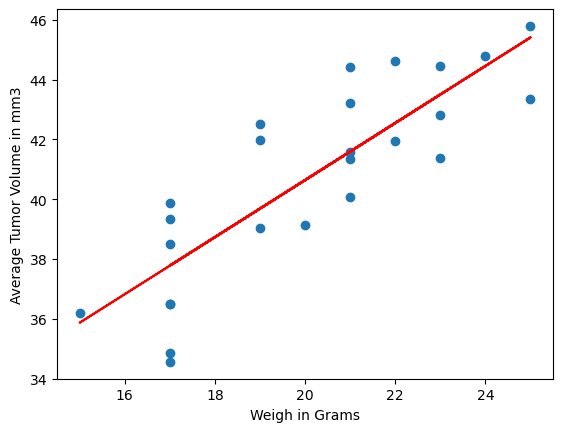

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
results = st.linregress(avg_weight, avg_tumor_vol)

#Make series so use pearsonr
avg_weight = pd.Series(avg_weight)

print(f"Correlation Coefficient:{round(st.pearsonr(avg_weight,avg_tumor_vol)[0],2)}")

# Plot the scatter plot of the average weight and tumor volume
plt.scatter(avg_weight, avg_tumor_vol)
plt.plot(avg_weight, results.intercept + results.slope*(avg_weight), 'r')
plt.xlabel("Weigh in Grams") 
plt.ylabel("Average Tumor Volume in mm3")
plt.show()